## (OLS) Linear Regression

We consider the problem setting with an input vector $x^{(i)} \in \mathbb R^d$ and a target scalar $y^{(i)} \in \mathbb R$. Then the goal of linear regression is to learn a linear function of the input such that
$$
y \approx w^\top x + b
$$
For a set of weights $w \in \mathbb R^d$ and a scalar bias $b$. For simplicity, we often add a dimension to $w$ and $x$ to *absorb* the bias, giving us a simpler expression using
$$
w = \begin{bmatrix}w \\ b\end{bmatrix} \\
x = \begin{bmatrix}x \\ 1\end{bmatrix} \\
$$
And finally
$$
y \approx w^\top x
$$
Which makes bookeeping easier. Our goal will be to minimize the *residual sum of squares*, i.e. the squared distance from each target $y^{(i)}$ to the prediction $w^\top x^{(i)}$ given by
$$
RSS(w) = \frac{1}{2}\sum_{i=1}^N(y^{(i)} - w^\top x^{(i)})^2
$$

If we stack our inputs into a matrix $X \in \mathbb R^{(N \times (d + 1))}$ with each row a transposed sample and our outputs into $y \in \mathbb R^N$ for a dataset of size $N$, we find that we can express the residuals as:
$$
RSS(w) = \frac{1}{2}(Xw - y)^\top (Xw - y)
$$
By taking the gradient and setting to $0$, we find:
$$
\nabla_w RSS(w) = X^\top Xw - X^\top y = 0 \\
X^\top X w = X^\top y \\
\hat{w} = (X^\top X)^{-1} X^\top y
$$

This closed-form optimal solution for the weights is known as the **ordinary least squares** (OLS) solution.

## Implementation of OLS Solution

In [37]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [38]:
# imports
import numpy as np
import matplotlib.pyplot as plt

We assume that our data is coming from some underlying "true distribution" parametrized by a true set of weights and a true bias. In this single-feature example, we can start by generating some dummy parameters for the model to start with, and sampling 100 data points from that distribution.

True Weight param: 1.1236203565420875
True Bias param: 4.75357153204958


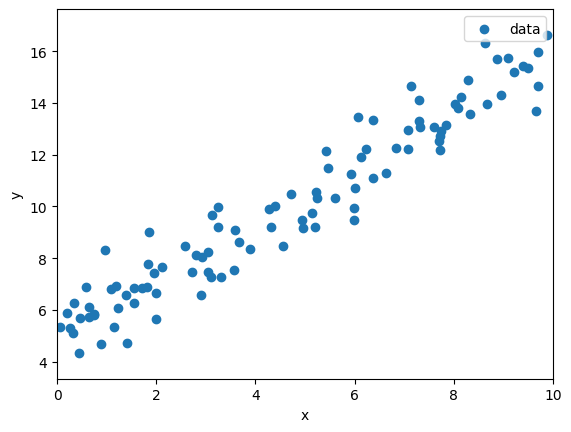

In [39]:
# for reproducibility
np.random.seed(42)

# get some random parameters for the model
true_w = 3 * np.random.random()
print(f"True Weight param: {true_w}")

true_b = 5 * np.random.random()
print(f"True Bias param: {true_b}")


# generate 100 random inputs in the range [0, 10]
X = 10 * np.random.rand(100, 1)
y = true_w * X + true_b + np.random.randn(100, 1) # adding some noise to the output to model some real-world data

#visualize the data
plt.scatter(X, y, label='data')
plt.xlim(0, 10)
plt.ylim(y.min() - 1, y.max() + 1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Given our data, we can use `numpy` to solve for our analytical solution.

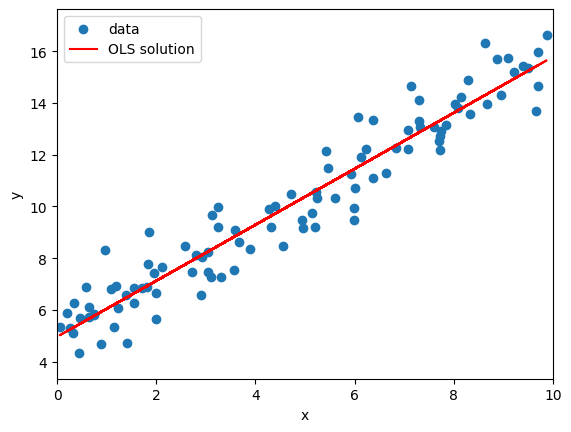

In [40]:
# turn bias term into last dim of inputs
X_aug = np.hstack([X, np.ones_like(X)])

# compute the OLS solution
w_hat = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

b_hat = w_hat[-1]
w_hat = w_hat[:-1]

# plot the data and the OLS solution
plt.scatter(X, y, label='data')
plt.xlim(0, 10)
plt.ylim(y.min() - 1, y.max() + 1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, w_hat * X + b_hat, label='OLS solution', color='red')
plt.legend()

As you can see, the resulting line minimizes the sum of the squared distances to each point. Some issues in practice, however, arise when we try to apply this concept to large-scale or high-dimensional problems (like deep learning); at these sizes, computing matrix inverses is impractical. In those cases, we often use iterative optimization algorithms like gradient descent.

#### Key Takeaways
- linear regression learns a linear function to generate output from input
- augmented data matrix includes bias term dimension of ones
- analyitical OLS solution efficient but computational impractical
- gradient descent often employed instead